In [102]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
 
init_notebook_mode(connected=True)
from sklearn.cluster import KMeans
import pandas as pd
import plotly.graph_objs as go
from plotly.offline import iplot

In [103]:
data = pd.read_excel(r'standarized_data.xlsx')

Nadanie kategorii numerycznej każdej kolumnie niezawierającej danych liczbowych

In [104]:
from sklearn.preprocessing import LabelEncoder

# Tworzenie instancji LabelEncoder
label_encoder = LabelEncoder()

# Iterowanie przez kolumny DataFrame
for col in data.columns:
    if data[col].dtype == 'object':  # Czy kolumna zawiera tekst
        # Przypisanie nowych etykiet
        data[col] = label_encoder.fit_transform(data[col])


In [105]:
df = pd.DataFrame(data)
df

,patient_id,age_at_diagnosis,cohort,neoplasm_histologic_grade,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,tumor_size,tumor_stage,...,muc16_mut,ahnak2_mut,kmt2c_mut,syne1_mut,gata3_mut,map3k1_mut,chemotherapy,hormone_therapy,overall_survival,radio_therapy
0,2,43.19,-1.326747,0.919140,-0.502920,-0.903022,-0.011659,-0.553501,-1.068571,-1.369083,...,0,1,0,0,1,0,0,1,1,1
1,8,76.97,-1.326747,0.919140,1.563865,-0.903022,1.801793,-1.128083,0.891144,0.448875,...,0,1,0,0,1,0,1,1,0,1
2,10,78.77,-1.326747,0.919140,-0.502920,-0.418952,0.025314,-1.573849,0.303229,4.084792,...,0,1,0,0,2,0,0,1,0,1
3,28,86.41,-1.326747,0.919140,-0.244572,-0.418952,0.879221,-1.191827,-0.676628,0.448875,...,136,1,0,0,1,0,0,1,0,1
4,35,84.22,-1.326747,-0.653944,-0.502920,-0.176917,-0.860285,-1.195811,0.107258,0.448875,...,0,1,73,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1514,7278,67.89,1.122012,-0.653944,-0.244572,-0.660987,-0.002856,1.527036,-0.741952,-0.004642,...,0,1,0,0,1,148,0,1,0,0
1515,7280,63.50,1.122012,-0.653944,1.047169,0.065117,0.921476,0.919253,0.891144,-0.004642,...,43,1,0,0,1,27,0,1,1,0
1516,7284,61.23,1.122012,0.919140,-0.244572,-0.176917,0.877461,1.018411,-0.741952,-0.004642,...,0,1,0,0,1,0,0,1,0,0
1517,7286,66.48,1.122012,0.919140,0.272124,-0.903022,0.895067,0.429221,-0.088714,-0.004642,...,0,43,0,0,1,0,0,1,0,0


In [106]:
data_kat= df.to_excel('data_kat.xlsx', index=False)

In [107]:
df_kat = pd.read_excel(r'data_kat.xlsx')

In [108]:
df_kat_drop = df_kat.drop(['patient_id', 'age_at_diagnosis'], axis = 1)

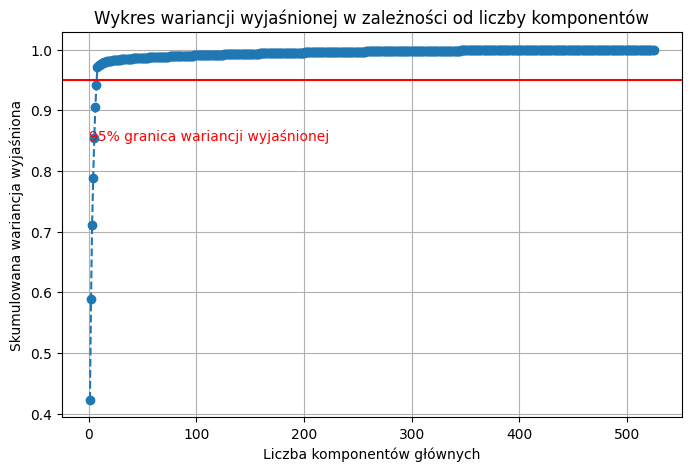

In [109]:
# Dopasowanie PCA bez ograniczania liczby komponentów, aby zbadać całą wariancję
pca = PCA()
pca.fit(df_kat_drop)

# Obliczenie skumulowanej wariancji wyjaśnionej
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Tworzenie wykresu
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Wykres wariancji wyjaśnionej w zależności od liczby komponentów')
plt.xlabel('Liczba komponentów głównych')
plt.ylabel('Skumulowana wariancja wyjaśniona')
plt.axhline(y=0.95, color='r', linestyle='-')  # Linia dla 95% wyjaśnionej wariancji
plt.text(0.5, 0.85, '95% granica wariancji wyjaśnionej', color = 'red')
plt.grid(True)

plt.show()

In [110]:
from sklearn.decomposition import PCA

def apply_pca(data, columns_to_exclude=None, n_components=3):
    if columns_to_exclude:
        exclude_filter = ~df_kat.columns.isin(columns_to_exclude)
    else:
        exclude_filter = ~df_kat.columns.isin([])

    # Stosowanie PCA na wyfiltrowanych danych
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(df_kat.loc[:, exclude_filter])

    return principal_components

# Używanie zmodyfikowanej funkcji na danych
principal_components = apply_pca(df_kat, columns_to_exclude=['patient_id'])

In [111]:
principal_df = pd.DataFrame(data = principal_components, 
                           columns = ['principal component 1', 'principal component 2', 'principal component 3'])

principal_df['patient_id'] = df_kat['patient_id']
principal_df

,principal component 1,principal component 2,principal component 3,patient_id
0,41.248819,-29.222147,-11.015307,2
1,182.903919,-37.752903,-12.136192,8
2,117.663245,-34.254380,-9.394124,10
3,-17.998712,102.414233,-54.930725,28
4,-55.788066,-18.100330,-12.292287,35
...,...,...,...,...
1514,-61.643444,-22.812678,-7.894099,7278
1515,-51.500579,16.861775,-24.588897,7280
1516,-52.643898,-23.788885,-10.930897,7284
1517,-51.781628,-10.325266,28.693617,7286


In [112]:
trace0 = go.Scatter(
    x = principal_df['principal component 1'],
    y = principal_df['principal component 2'],
    text=principal_df['patient_id'],
    textposition="top center",
    name = 'Piony',
    mode = 'markers+text',
    marker = dict(
        size = 10,
        color = 'rgb(228,26,28)',
        line = dict(
            width = 1,
            color = 'rgb(0, 0, 0)'
        )
    )
)
 
data = [trace0]
 
layout = dict(title = 'PCA',
              yaxis = dict(zeroline = False, title ='PC2 (principal component 2)'),
              xaxis = dict(zeroline = False, title ='PC1 (principal component 1)')
             )
 
fig = dict(data=data, layout=layout)
iplot(fig, filename='styled-scatter')

In [113]:
trace0 = go.Scatter(
    x = principal_df['principal component 2'],
    y = principal_df['principal component 3'],
    text=principal_df['patient_id'],
    textposition="top center",
    name = 'Piony',
    mode = 'markers+text',
    marker = dict(
        size = 10,
        color = 'rgb(228,26,28)',
        line = dict(
            width = 1,
            color = 'rgb(0, 0, 0)'
        )
    )
)
 
data = [trace0]
 
layout = dict(title = 'PCA',
              yaxis = dict(zeroline = False, title ='PC3 (principal component 3)'),
              xaxis = dict(zeroline = False, title ='PC2 (principal component 2)')
             )
 
fig = dict(data=data, layout=layout)
iplot(fig, filename='styled-scatter')

In [114]:
trace0 = go.Scatter(
    x = principal_df['principal component 1'],
    y = principal_df['principal component 3'],
    text=principal_df['patient_id'],
    textposition="top center",
    name = 'Piony',
    mode = 'markers+text',
    marker = dict(
        size = 10,
        color = 'rgb(228,26,28)',
        line = dict(
            width = 1,
            color = 'rgb(0, 0, 0)'
        )
    )
)
 
data = [trace0]
 
layout = dict(title = 'PCA',
              yaxis = dict(zeroline = False, title ='PC3 (principal component 3)'),
              xaxis = dict(zeroline = False, title ='PC1 (principal component 1)')
             )
 
fig = dict(data=data, layout=layout)
iplot(fig, filename='styled-scatter')

### Bardziej przejrzysty plot (mam nadzieję)

In [115]:
trace0 = go.Scatter(
    x = principal_df['principal component 1'],
    y = principal_df['principal component 2'],
    text=principal_df['patient_id'],
    hoverinfo='text',  # Pokazuje identyfikatory pacjentów tylko po najechaniu
    mode = 'markers',
    marker = dict(
        size = 7,  # Mniejsze markery
        color = 'rgb(228,26,28)',
        opacity=0.5,  # Półprzezroczyste markery
        line = dict(
            width = 1,
            color = 'rgb(0, 0, 0)'
        )
    )
)

data = [trace0]

layout = dict(title = 'PCA',
              yaxis = dict(zeroline = False, title ='PC2 (principal component 2)'),
              xaxis = dict(zeroline = False, title ='PC1 (principal component 1)')
             )

fig = dict(data=data, layout=layout)
iplot(fig, filename='styled-scatter')


### KMeans

In [117]:
from sklearn.cluster import KMeans
import pandas as pd
import plotly.graph_objs as go
from plotly.offline import iplot

num_clusters = 5

kmeans = KMeans(n_clusters=num_clusters)
principal_df['cluster'] = kmeans.fit_predict(principal_df[['principal component 1', 'principal component 2']])

traces = []
for cluster_id in range(num_clusters):
    cluster_data = principal_df[principal_df['cluster'] == cluster_id]
    trace = go.Scatter(
        x = cluster_data['principal component 1'],
        y = cluster_data['principal component 2'],
        mode = 'markers',
        marker = dict(
            size = 10,
            opacity = 0.5,  # Półprzezroczyste markery
            line = dict(
                width = 1,
                color = 'rgb(0, 0, 0)'
            )
        ),
        name = f'Cluster {cluster_id}'
    )
    traces.append(trace)


centroids = kmeans.cluster_centers_
centroid_trace = go.Scatter(
    x = centroids[:, 0],
    y = centroids[:, 1],
    mode = 'markers+text',
    marker = dict(
        size = 14,
        color = 'rgb(0,0,0)',
        symbol = 'x'
    ),
    text = [f'Centroid {i}' for i in range(num_clusters)],
    textposition = 'top center',
    name = 'Centroids'
)
traces.append(centroid_trace)


layout = go.Layout(
    title = 'Klasteryzacja PCA z K-means',
    xaxis = dict(title = 'PC1 (principal component 1)'),
    yaxis = dict(title = 'PC2 (principal component 2)'),
    hovermode = 'closest'
)


fig = go.Figure(data=traces, layout=layout)
iplot(fig, filename='pca-kmeans-clustering')


c:\Users\Julia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



### HCA

In [118]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [119]:
#Metoda Warda
linked = linkage(principal_df, method='ward')

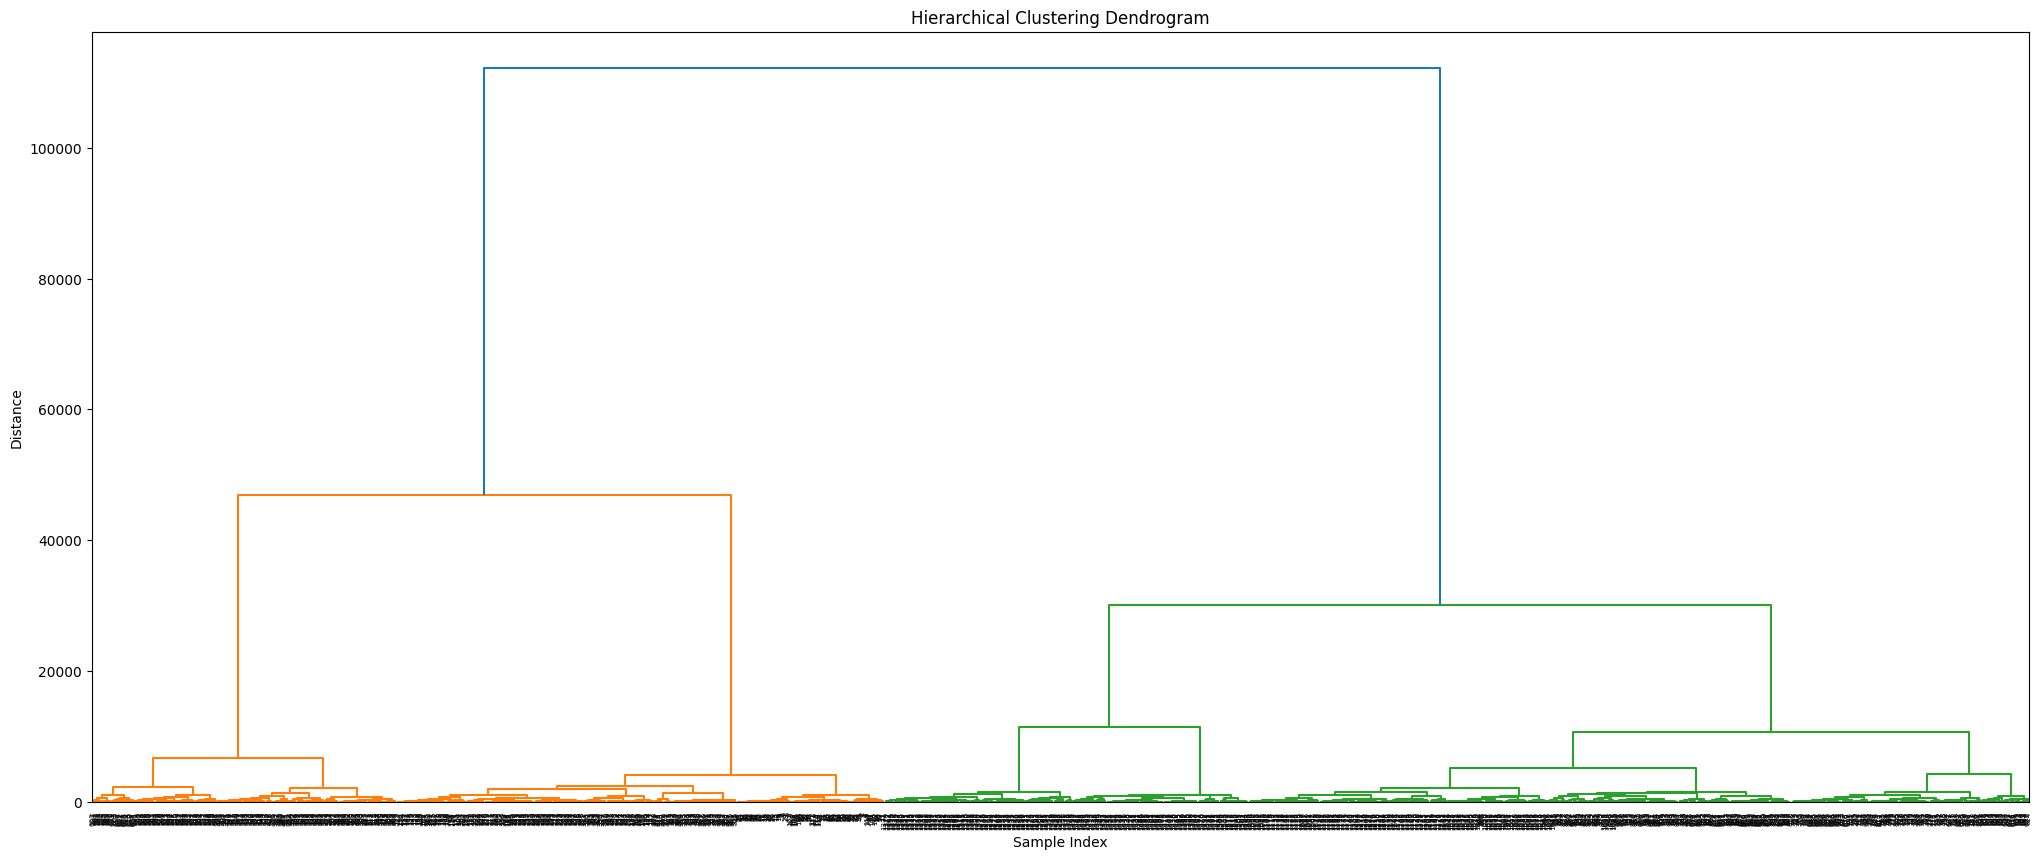

In [122]:
#Dendrogram
plt.figure(figsize=(25, 10))
dendrogram(linked, 
           orientation='top', 
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


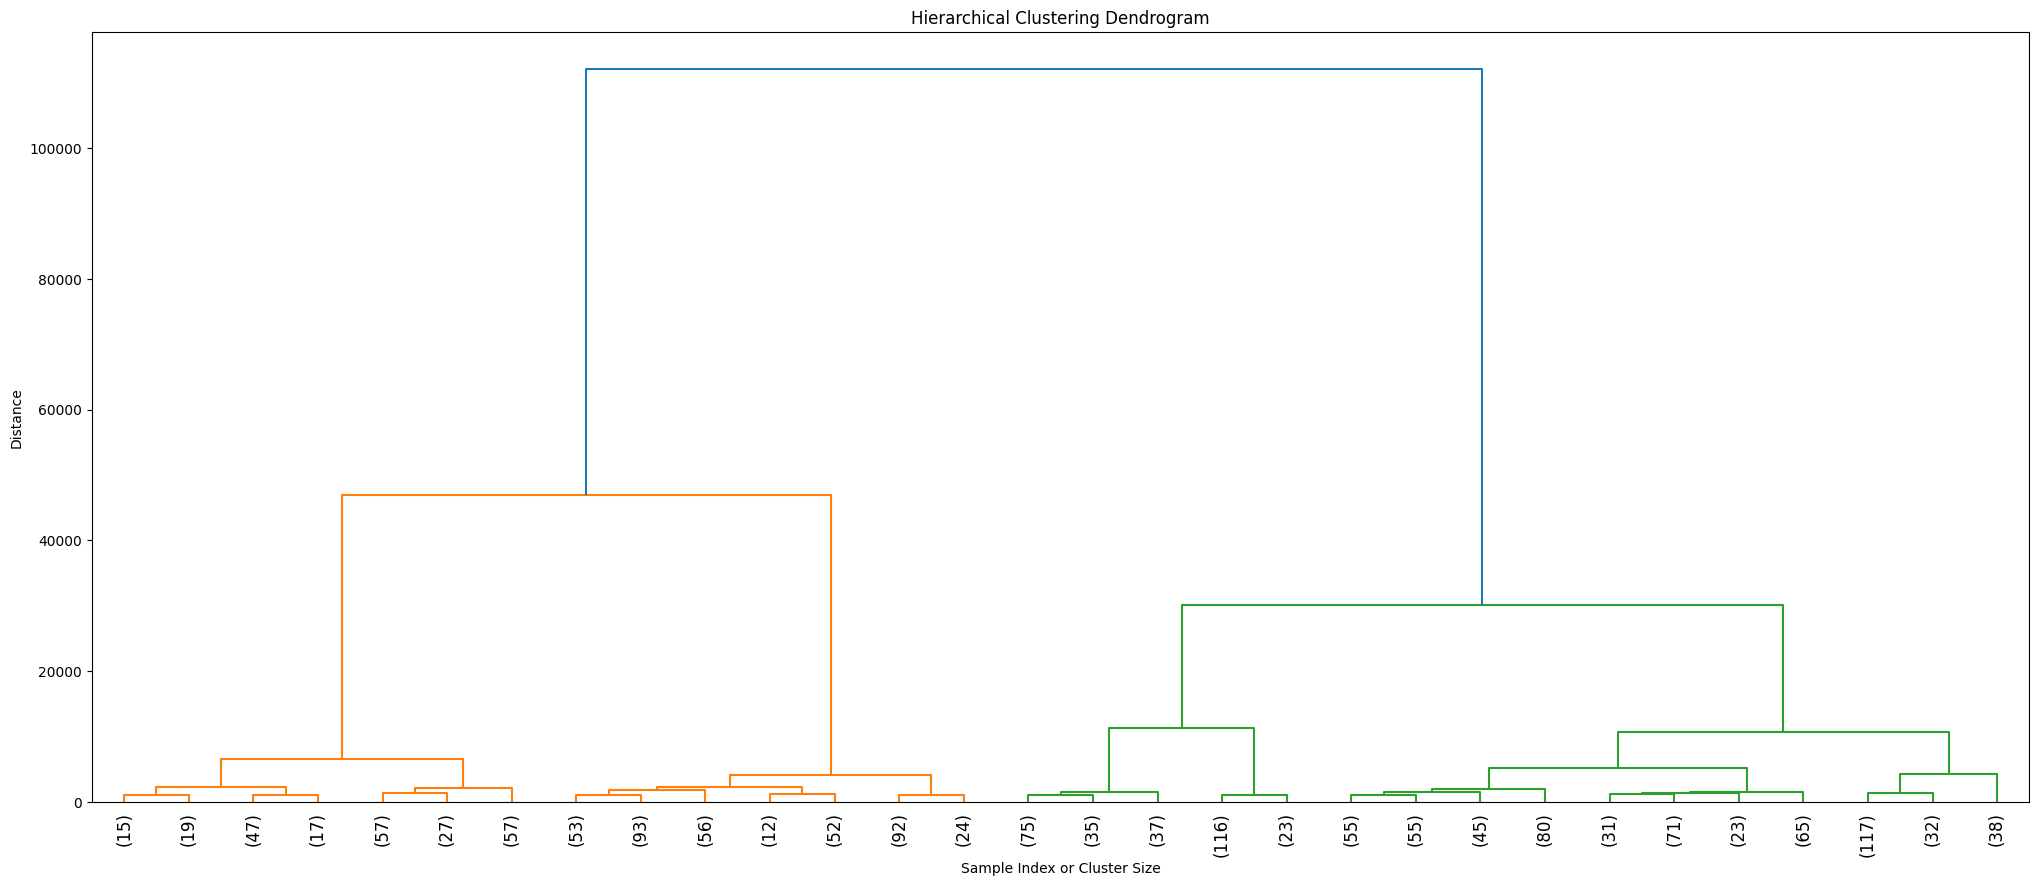

In [121]:
plt.figure(figsize=(25, 10))  # Zwiększenie rozmiaru rysunku
dendrogram(
    linked,
    orientation='top',
    distance_sort='descending',
    show_leaf_counts=True,
    truncate_mode='lastp',  # Wyświetlanie tylko ostatnich p połączonych klastrów
    p=30,  # Ustawienie, aby wyświetlać tylko 30 klastrów
    leaf_rotation=90.,  # Obrót etykiet liści, jeśli są wyświetlane
    leaf_font_size=12.,  # Dostosowanie rozmiaru czcionki dla lepszej czytelności
)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')
plt.show()